<a href="https://colab.research.google.com/github/VfrMark/Projeto_final_gauss_mix/blob/main/Projeto_final_MTM3587_08222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução a Modelos de Mistura Gaussiana

Neste notebook visa-se apresentar uma introdução aos __modelos de mistura gaussiana__, trazendo conceitos tanto teóricos, como práticos. 

Você verá: 

* Intuição dos __modelos de mistura gaussiana___
* Hipóteses assumidas para a construção do modelo
* Fundamentação matemática e probalística
* Prós e contrás desse tipo de modelo
* Aplicação prática com a biblioteca sklearn.

Esse trabalho foi desenvolvido com o intuito de servir como avaliação final da matéria curso de Machine Learning oferecida na Universidade Federal de Santa Catarina lecionado pelo Professor Edson Cilos.

Você também poderá encontrar o curso [aqui](https://www.udemy.com/course/edson-cilos-ml/).

#Introdução

Nosso objetivo ao criar um modelo é, em geral, conseguir representar e explicar os dados de alguma forma. É possível construir modelos de regressão, que por exemplo através de polinômios e interpolação infere os valores novos de uma função alvo.

Ou é possível utilizar modelos de redução de dimensionalidade para conseguir visualizar a estrutura dos dados em 2D ou 3D.

Nesse notebook veremos __modelos de mistura gaussiana__, que visa explicar os dados por meio de uma união de distribuições normais ou gaussianas de probabilidade.

#Conceitos iniciais


Vamos iniciar apresentando o conceito de _Hard Assignment_ vs _Soft Assignment_.

Intuitivamente, para um problema de classificaçãoo com _Hard Assignment_ um dado pertence somente a uma classe, esse dado é 100% da classe atribuida a ele. 

Por exemplo, o algoritmo _K-means_ calcula o vizinho mais próximo e atribui à nova instância a classe desse vizinho.

Já para o _soft assignment_ podemos pensar como um dado podendo pertence parcialmente a diferentes classes.

Por exemplo uma nova instância do seu conjunto de dados pode pertencer 70% a classe __A__ e 30% a classe __B__. Isso é feito atribuindo um _score_/valor de probabilidade desse dados pertencer a cada conjunto.

###Vejamos o seguinte exemplo

Para simplificar a visualização, vejamos o caso onde temos dados em apenas uma dimensão e distribuições gaussianas quaisquer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app


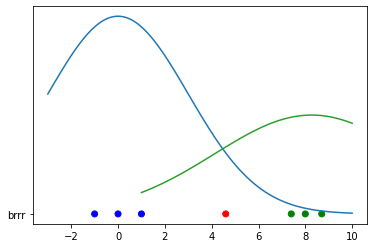

In [77]:
#Código apenas para gerar exemplos, valores aleatórios.

from matplotlib import pyplot as mp
import numpy as np

def gaussian(x,x0,sigma):
  return np.exp(-np.power((x - x0)/sigma, 2.)/2.)


x_values = np.linspace(-3, 10, 120)
x_values_2 = np.linspace(1, 10, 120)

mp.plot(x_values, gaussian(x_values, 0, 3), ['brrr'])
mp.plot(x_values_2, (1/2)*gaussian(x_values, 7.5, 6))
mp.scatter([-1,0, 1,4.6,7.4,8,8.7], [0,0,0,0,0,0,0], c='bbbrggg')

mp.show()

Os pontos em azul tem mais probabilidade de pertencer a distribuição azul e os verdes tem mais probabilidade de ser da verde. 

Ou seja, é mais provavel que os pontos azuis sejam amostras da variável aleatória que é descrita pela distribuição azul, e analogamente para o verde.

Agora veja o ponto vermelho, está na intersecção entre essas distribuições, é um ponto 50% azul e 50% verde.

O objetivo do __modelo de mistura gaussiana__ é construir uma distribuição que é uma combinação/mistura de distribuições gaussianas, como a azul e verde do exemplo, para modelar os dados.

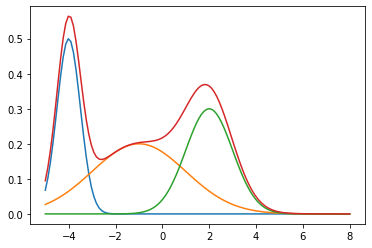

In [78]:
#Exemplos construído apartir do livro Mathematics for Machine Learning.

x_values2 = np.linspace(-5, 8, 120)

mp.plot(x_values2, (1/2)*gaussian(x_values, -2, 1/2))
mp.plot(x_values2, (0.2)*gaussian(x_values, 1, 2))
mp.plot(x_values2, (0.3)*gaussian(x_values, 4, 1))

mp.plot(x_values2, (1/2)*gaussian(x_values, -2, 1/2) + (0.2)*gaussian(x_values, 1, 2) + (0.3)*gaussian(x_values, 4, 1))

mp.show()

Assim, a linha vermelha é uma distribuição que é combinação das três outras combinações gaussianas.

#Formulação matemática

Após entender conceitualmente como esse modelo funciona, vamos definí-lo formalmente.

Seja o conjunto de dados não rotulados $\mathcal{X} = \{x^{(1)}, x^{(2)}, \cdots, x^{(N)}\}$, onde $x^{(i)} = (x^{(i)}_1, x^{(i)}_2, \cdots, x^{(i)}_n) \in \mathbb{R}^n$. Aqui estamos supondo que esses dados são amostras i.i.d de uma distribuição desconhecida $p(x \mid \theta)$.

Considere $K \in \mathbb{Z}$ distribuições gaussiana $\mathcal{N}(x \mid \mu_k, \Sigma_k )$. Um __modelo de mistura gaussiana__ é um modelo de densidade tal que $$p(\mathcal{X} \mid \theta) = \sum_{k=1}^{K} \pi_{k}\mathcal{N}(x \mid \mu_k,  \Sigma_k )$$ e $$ 0 \leq \pi_k \leq 1, \qquad \sum_{k=1}^{K} \pi_k = 1$$

Define-se $\theta = \{\mu_k, \Sigma_k, \pi_k : k = 1, \cdots, K\}$ como a coleção de parâmetros do modelos. E ainda a média $\mu$ e covariância $\Sigma$ como:

\\
$$\mu = \frac{1}{N} (x^{(1)}_1 + x^{(2)}_1 + \cdots + x^{(N)}_1, \cdots, x^{(1)}_n + x^{(2)}_n + \cdots + x^{(N)}_n)$$

\\

$$\Sigma = \begin{bmatrix} 
Var(x_1) & Cov(x_1,x_2) & \cdots & Cov(x_1,x_n)  \\ 
Cov(x_2,x_1) & Var(x_2) & \cdots & Cov(x_2,x_n)   \\
\vdots & \vdots & \ddots & \vdots   \\
Cov(x_n,x_1) & Cov(x_n, x_2) & \cdots & Var(x_n) &
\end{bmatrix}
$$

O objetivo agora é encontrar uma boa representação da distribuição $p(x \mid \theta)$ por meio da mistura gaussiana com $K$ componentes.

Para isso, encontraremos os parâmetros $\theta_{ML}$ que maximizam o _log-likelihood_, ou seja, que maximizam a seguinte equação
$$log \ p(\mathcal{X} \mid \theta)= \sum_{n=1}^N log \ p(x_n \mid \theta) = \sum_{n=1}^N log \ \sum_{n=1}^K \pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k  $$

Definiremos também a seguinte medida

$$r_{nk} = \frac{\pi_k\mathcal{N}(x_n \mid \mu_k,  \Sigma_k )}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x_n \mid \mu_j,  \Sigma_j )}$$

é a responsabilidade da k-ésima componente de mistura para o n-ésimo dado

A responsabilidade $r_{nk}$ da k-ésima componente de mistura para o dado $x_n$ é proporcional a verossimilhança

$$p(x_n \mid \pi_k, \mu_k, \Sigma_k) = \pi_k\mathcal{N}(x_n, \mu_k,\Sigma_k)$$

Logo, componentes de mistura possume mais responsabilidade para um dado quando esse dado pode ser uma amostra plausível da variável aleatória representada por aquela componente de mistura.

veja ainda que o vetor $$r_n = [r_{n1}, r_{n2}, \cdots, r_{nK} ]^\intercal$$ é um vetor de probabilidade normalizado, ou seja, $\sum_{k}r_{nk}=1$ com $r_{nk} \geq 0$.

Esse vetor distribui uma massa ou score de probabilidade entre os K componentes de mistura. $r_n$ é o _soft assignment_ para o dado $x_n$ em relação aos K componentes



###Teoremas importantes

No processo iterativo de encontrar os parâmetros que melhor descrevem os dados, veremos que todas as equações de atualização dos parâmetros $\mu_k, \Sigma_k, \pi_k$ dependem das responsabilidades, o que torna impossível uma solução de forma fechada para o problema de estimação de máxima verossimilhança.

Para contornar isso, é feito o processo de para responsabilidades dadas são calculados e atualizados um parâmetro do modelo por vez, mantendo os outros fixos. Após isso, as responsabilidades serão recomputadas.

__Teorema 1:__ A atualização dos parâmetros $\mu_k, k = 1, \cdots, K$, do modelo de mistura gaussiana é dado por:

$$\mu_k^{new} = \frac{\sum_{n=1}^{N}r_{nk}x_n}{\sum_{n=1}^{N}r_{nk}}$$

__Teorema 2:__ A atualização dos parâmetros $\Sigma_k$ são 

$$\Sigma_k^{new} = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}(x_n - \mu_k)(x_n - \mu_k)^\intercal).$$

__Teorema 3:__ As atualizações dos parâmetros $\pi_k$ são dados por

$$\pi_k^{new} = \frac{N_k}{N}, \qquad k=1, \cdots, K$$

As provas desses teoremas estão além do escopo desse notebook, você pode encontrá-las no capítulo de misturas gaussianas da referência (1).

###Estimando os parâmetros

Para estimar os parâmetros do modelo de misturas gaussianas segue-se o seguinte algoritmo:

* Inicia-se com parâmetros $\mu_k,\Sigma_k , \pi_k$ aleatórios
* Repetir em loop até convergir
  * Avaliar as responsabilidades $r_{nk}$ para cada ponto $x_n$ utilizando os parâmetros $\mu_k,\Sigma_k , \pi_k$ atuais:
$$r_{nk} = \frac{\pi_k \mathcal{N}(x_n \mid \mu_k, \Sigma_k)}{\sum_{j}\pi_j\mathcal{N}(x_n \mid \mu_j, \Sigma_j)}$$

  * Reestimar os parâmetros $\mu_k,\Sigma_k ,\pi_k$ com as responsabilidades $r_{nk}$ computadas.

$$\mu_k = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}x_n$$

$$\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N}r_{nk}(x_n - \mu_k)(x_n - \mu_k)^\intercal$$

$$\pi_k = \frac{N_k}{N}$$



Esse algoritmo é chamado de _ expectation maximization_ ou algoritmo EM, e após finalizar esse processo, temos uma distribuição de densidade $p(\mathcal{X} \mid \theta^{*})$ que explica os nossos dados, onde $\theta^{*}$ é o conjunto com os melhores parâmetros encontrados.

#Prós e contras


* __Prós__:
  * Velocidade: O modelo de misturas gaussianas é o algoritmo mais rápido para treinar entre os modelos de misturas.
  * Capacidade de aprender estruturas complexas dos dados, como diferentes formas e mesmo agrupamentos dos dados que se sobrepõe.
  * Como já comentado, esse algoritmo é capaz de aplicar _soft assignment_.


* __Contras__:
  * Quando não se tem pontos suficiente para cada componentes de mistura estimar as matrizes de covariância torna-se difícil, e o algoritmo é conhecido por divergir e encontrar soluções com verossimilhança infinita.
  * Na prática, geralmente não se sabe qual valor de K, ou seja, quantas componentes de misturas há.

#Aplicação

A biblioteca _sklearn_ facilita treinar modelos de mistura gaussiana uma vez que eles já implementaram o código e podemos apenas passar os hiperparâmetros que queremos e treinar o modelo.

Veja a seguir os hiperparâmetros que é possível estabelecer segundo a documentação do _sklearn_

sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

Vale destacar os parâmetros _weights\_init_, _means\_init_, que nos permite iniciar o modelo com $\pi_k, \mu_k$ específicos.

Utilizamos a seguir o california housing dataset para exemplifícar como podemos treinar o modelo com o _sklearn_

In [79]:
#importando os dados do sklearn
from sklearn import datasets
import pandas as pd

iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

In [80]:
#Ver quantidade de instâncias e features desse conjunto de dados
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [81]:
#Criando um conjunto de teste com duas instâncias apenas para exemplificar

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

X_train = df_X.drop([15,57])
y_train = df_y.drop([15,57])
X_test = df_X.iloc[[15,57]]
y_test = df_y.iloc[[15,57]]

In [82]:
# Importações necessárias para construir a pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pipeline que será usada para tratar os dados

pipeline = Pipeline([
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
             ])

In [83]:
# Passando os dados pelo pipeline

iris_prepared = pipeline.fit_transform(X_train)

In [84]:
#Treinando modelo
from sklearn.mixture import GaussianMixture

gauss_mixture = GaussianMixture(n_components = 3, random_state = 42)

In [85]:
model = gauss_mixture.fit(X_train)

Com o modelo treinado, vejamos os scores de probabilidade que o modelo aplica aos dois pontos que tinhamos separado como 'teste'.

In [87]:
model.predict_proba(X_test)

array([[2.76846497e-46, 1.00000000e+00, 7.57579754e-63],
       [1.80212308e-04, 2.31124131e-33, 9.99819788e-01]])

Observamos que para o primeiro dado, o score de probabilidade associado a componente 1 e 3 é extremamente baixo, e a componente 2 é praticamente 100%.

Para o segundo dado, temos um score baixo para as componentes 1 e 2 e maior probabilidade para a componente 3.

#Bibliografia

(1) Deisenroth , M. Peter; Faisal, A. Aldo; Ong, C. Soon. Mathematics for Machine Learning. Cambridge: Cambridge University Press, 2020. [Link](https://mml-book.github.io/book/mml-book.pdf);

(2) Machine Learning | Curso completo em Python | 2022. [Link](https://www.udemy.com/course/edson-cilos-ml/);

(3) Scikit Learning, 2022. [link](https://scikit-learn.org/stable/modules/density.html).

(4) Aurlien Gron. 2017. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd. ed.). O'Reilly Media, Inc.